<a href="https://colab.research.google.com/github/SAFIN-157/Automobile-Data-Preprocessing/blob/main/Laptop_Price_Data_Pre_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Data and Change the Column Header**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"
df = pd.read_csv(filepath, header=0) # Set header to 0 to use the first row as headers
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB
None


,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


**The Screen_Size_cm column such that all values are rounded to nearest 2 decimal**

In [2]:
df[['Screen_Size_cm']] = np.round(df[['Screen_Size_cm']],2)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


**Evaluate the dataset for missing data**

In [3]:
df.replace("?", np.nan, inplace = True)
missing_data = df.isnull()
missing_data.head()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Unnamed: 0
Unnamed: 0
False    238
Name: count, dtype: int64

Manufacturer
Manufacturer
False    238
Name: count, dtype: int64

Category
Category
False    238
Name: count, dtype: int64

Screen
Screen
False    238
Name: count, dtype: int64

GPU
GPU
False    238
Name: count, dtype: int64

OS
OS
False    238
Name: count, dtype: int64

CPU_core
CPU_core
False    238
Name: count, dtype: int64

Screen_Size_cm
Screen_Size_cm
False    234
True       4
Name: count, dtype: int64

CPU_frequency
CPU_frequency
False    238
Name: count, dtype: int64

RAM_GB
RAM_GB
False    238
Name: count, dtype: int64

Storage_GB_SSD
Storage_GB_SSD
False    238
Name: count, dtype: int64

Weight_kg
Weight_kg
False    233
True       5
Name: count, dtype: int64

Price
Price
False    238
Name: count, dtype: int64



**Replace with mean**

In [4]:
avg_Weight = df["Weight_kg"].astype("float").mean(axis=0)
print("Average of Weight:", avg_Weight)
df["Weight_kg"].replace(np.nan, avg_Weight, inplace = True)
df.head(50)

Average of Weight: 1.8622317596566522


/tmp/ipython-input-1749849135.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Weight_kg"].replace(np.nan, avg_Weight, inplace = True)


,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.600000,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.200000,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.200000,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.220000,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.910000,837
5,5,Dell,3,Full HD,1,1,5,39.62,1.6,8,256,2.200000,1016
6,6,HP,3,Full HD,3,1,5,39.62,1.6,8,256,2.100000,1117
7,7,Acer,3,IPS Panel,2,1,5,38.10,1.6,4,256,2.200000,866
8,8,Dell,3,Full HD,1,1,5,39.62,2.5,4,256,2.300000,812
9,9,Acer,3,IPS Panel,3,1,7,38.10,1.8,8,256,2.200000,1068


**Replace with the most frequent value**

In [5]:
df['Screen_Size_cm'].value_counts()
common_screen_size = df['Screen_Size_cm'].value_counts().idxmax()
df["Screen_Size_cm"].replace(np.nan, common_screen_size, inplace=True)
df.tail(10)

/tmp/ipython-input-128387629.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Screen_Size_cm"].replace(np.nan, common_screen_size, inplace=True)


,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
228,228,HP,2,Full HD,2,1,5,31.75,2.3,8,256,1.26,2120
229,229,Dell,4,Full HD,2,1,5,35.56,2.5,8,256,1.36,2082
230,230,Dell,4,Full HD,2,1,5,39.62,2.5,8,256,1.36,1870
231,231,Dell,4,Full HD,2,1,7,35.56,2.8,8,256,1.36,2255
232,232,Toshiba,3,Full HD,2,1,5,33.78,2.3,8,256,1.20,1855
233,233,Lenovo,4,IPS Panel,2,1,7,35.56,2.6,8,256,1.70,1891
234,234,Toshiba,3,Full HD,2,1,5,33.78,2.4,8,256,1.20,1950
235,235,Lenovo,4,IPS Panel,2,1,5,30.48,2.6,8,256,1.36,2236
236,236,Lenovo,3,Full HD,3,1,5,39.62,2.5,6,256,2.40,883
237,237,Toshiba,3,Full HD,2,1,5,35.56,2.3,8,256,1.95,1499


**Fixing the data types**

In [6]:
df[["Weight_kg", "Screen_Size_cm"]] = df[["Weight_kg", "Screen_Size_cm"]].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  238 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       238 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


**Data Standardization**

In [7]:
df['Weight_kg'] = df['Weight_kg']*2.205
df.rename(columns={'Weight_kg':'Weight_lb'}, inplace=True)
df['Screen_Size_cm'] = df['Screen_Size_cm']/2.54
df.rename(columns={'Screen_Size_cm':'Screen_Size_inch'}, inplace=True)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_lb,Price
0,0,Acer,4,IPS Panel,2,1,5,14.000000,1.6,8,256,3.52800,978
1,1,Dell,3,Full HD,1,1,3,15.598425,2.0,4,256,4.85100,634
2,2,Dell,3,Full HD,1,1,7,15.598425,2.7,8,256,4.85100,946
3,3,Dell,4,IPS Panel,2,1,5,13.299213,1.6,8,128,2.69010,1244
4,4,HP,4,Full HD,2,1,7,15.598425,1.8,8,256,4.21155,837


**Data Normalization**

In [8]:
df['CPU_frequency'] = df['CPU_frequency']/df['CPU_frequency'].max()
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_lb,Price
0,0,Acer,4,IPS Panel,2,1,5,14.000000,0.551724,8,256,3.52800,978
1,1,Dell,3,Full HD,1,1,3,15.598425,0.689655,4,256,4.85100,634
2,2,Dell,3,Full HD,1,1,7,15.598425,0.931034,8,256,4.85100,946
3,3,Dell,4,IPS Panel,2,1,5,13.299213,0.551724,8,128,2.69010,1244
4,4,HP,4,Full HD,2,1,7,15.598425,0.620690,8,256,4.21155,837


**Binning**

In [9]:
bins = np.linspace(min(df["Price"]), max(df["Price"]), 4)
group_names = ['Low', 'Medium', 'High']
df['Price-binned'] = pd.cut(df['Price'], bins, labels=group_names, include_lowest=True )
df[['Price','Price-binned']].head(20)

,Price,Price-binned
0,978,Low
1,634,Low
2,946,Low
3,1244,Low
4,837,Low
5,1016,Low
6,1117,Low
7,866,Low
8,812,Low
9,1068,Low


Text(0.5, 1.0, 'Price bins')

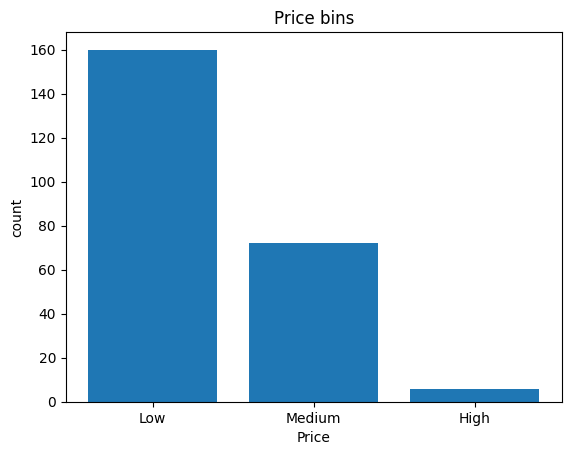

In [10]:
plt.bar(group_names, df["Price-binned"].value_counts())
plt.xlabel("Price")
plt.ylabel("count")
plt.title("Price bins")

**Indicator variables**

In [11]:
dummy_variable_1 = pd.get_dummies(df["Screen"])
dummy_variable_1.rename(columns={'IPS Panel':'Screen-IPS_panel', 'Full HD':'Screen-Full_HD'}, inplace=True)
df = pd.concat([df, dummy_variable_1], axis=1)
df.drop("Screen", axis = 1, inplace=True)
df.head()

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_lb,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,Acer,4,2,1,5,14.000000,0.551724,8,256,3.52800,978,Low,False,True
1,1,Dell,3,1,1,3,15.598425,0.689655,4,256,4.85100,634,Low,True,False
2,2,Dell,3,1,1,7,15.598425,0.931034,8,256,4.85100,946,Low,True,False
3,3,Dell,4,2,1,5,13.299213,0.551724,8,128,2.69010,1244,Low,False,True
4,4,HP,4,2,1,7,15.598425,0.620690,8,256,4.21155,837,Low,True,False


In [12]:
print(df.head())

   Unnamed: 0 Manufacturer  Category  GPU  OS  CPU_core  Screen_Size_inch  \
0           0         Acer         4    2   1         5         14.000000   
1           1         Dell         3    1   1         3         15.598425   
2           2         Dell         3    1   1         7         15.598425   
3           3         Dell         4    2   1         5         13.299213   
4           4           HP         4    2   1         7         15.598425   

   CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_lb  Price Price-binned  \
0       0.551724       8             256    3.52800    978          Low   
1       0.689655       4             256    4.85100    634          Low   
2       0.931034       8             256    4.85100    946          Low   
3       0.551724       8             128    2.69010   1244          Low   
4       0.620690       8             256    4.21155    837          Low   

   Screen-Full_HD  Screen-IPS_panel  
0           False              True  
1         

In [13]:
df.to_csv('clean_laptop_df.csv')